In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from brian2.units import *

In [14]:
data = np.load("D:/Work/Neurogenesis-PhD/simulation_statistics/last_std_ad_evo.npz")
print data['recording_archive_name']

..\synaptogenesis\case3_random_last_spike_3mil.npz


In [15]:
all_mean_sigmas = data['all_mean_sigmas']
all_mean_ads = data['all_mean_ads']

In [16]:
data['recording_archive_name'].ravel()[0]

'..\\synaptogenesis\\case3_random_last_spike_3mil.npz'

In [17]:
analysis_data = np.load("D:/Work/Neurogenesis-PhD/simulation_statistics/analysis__095719_06112017.npz")
init_mean_std = analysis_data['init_mean_std']
init_mean_AD = analysis_data['init_mean_AD']


In [18]:
original_results = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/case3_random_last_spike_3mil.npz")
simdata = np.array(original_results['sim_params']).ravel()[0]
data.close()
hardcoded_t_record = simdata['t_record'] * ms

In [19]:
hardcoded_t_record.dimensions

second

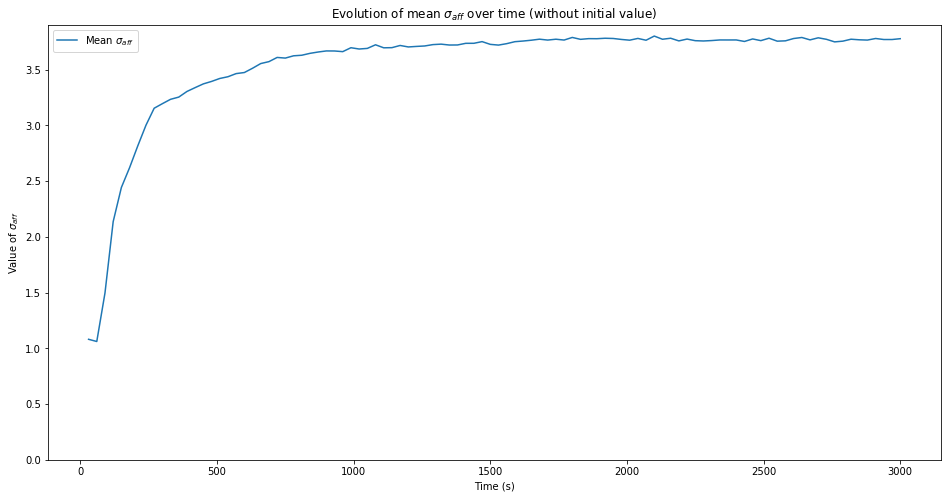

In [20]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(np.arange(1, all_mean_sigmas.size+1) * hardcoded_t_record, all_mean_sigmas, label='Mean $\sigma_{aff}$')
ax1.grid(visible=False)
ax1.set_title("Evolution of mean $\sigma_{aff}$ over time (without initial value)")
ax1.legend(loc='best')
ax1.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax1.set_ylim([0, np.max(all_mean_sigmas) + 0.1])
ax1.set_ylabel("Value of $\sigma_{aff}$")

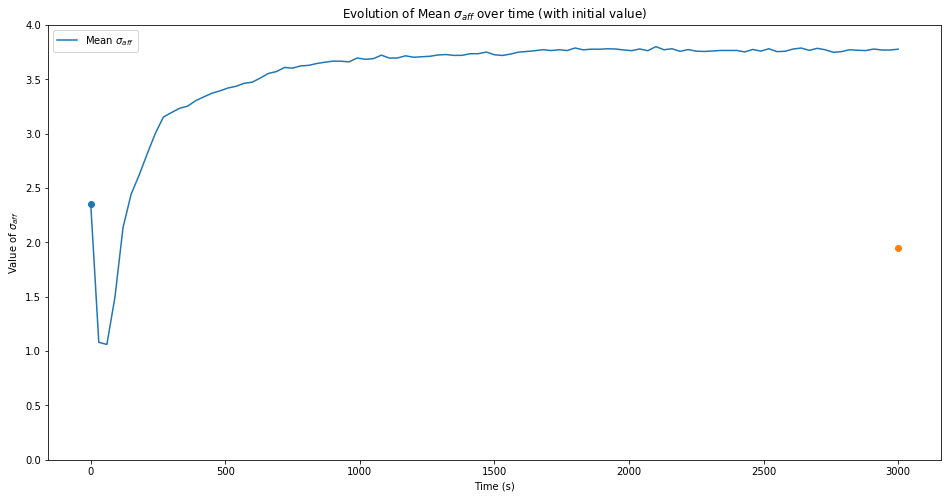

In [21]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
conc = np.concatenate(([init_mean_std],all_mean_sigmas))
i = ax1.plot(np.arange(all_mean_sigmas.size+1) * hardcoded_t_record, conc, label='Mean $\sigma_{aff}$')
ax1.grid(visible=False)
ax1.set_title("Evolution of Mean $\sigma_{aff}$ over time (with initial value)")
ax1.legend(loc='best')
ax1.set_ylim([0, np.max(conc) + 0.2])
ax1.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax1.set_ylabel("Value of $\sigma_{aff}$")

ax1.scatter(0, 2.35)
ax1.scatter(all_mean_sigmas.size* hardcoded_t_record, 1.95)
plt.savefig("mean_std_evo.png")

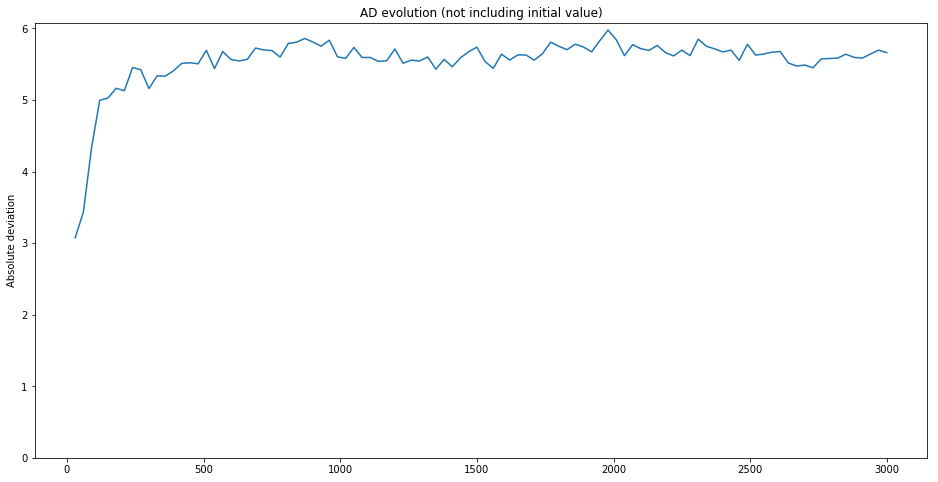

In [22]:
f, (ax) = plt.subplots(1, 1,figsize=(16,8))
ax.plot(np.arange(1, all_mean_ads.size+1) * hardcoded_t_record, all_mean_ads)
ax.set_title("AD evolution (not including initial value)")
ax1.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax.set_ylim([0, np.max(all_mean_ads) + 0.1])
ax.set_ylabel("Absolute deviation")

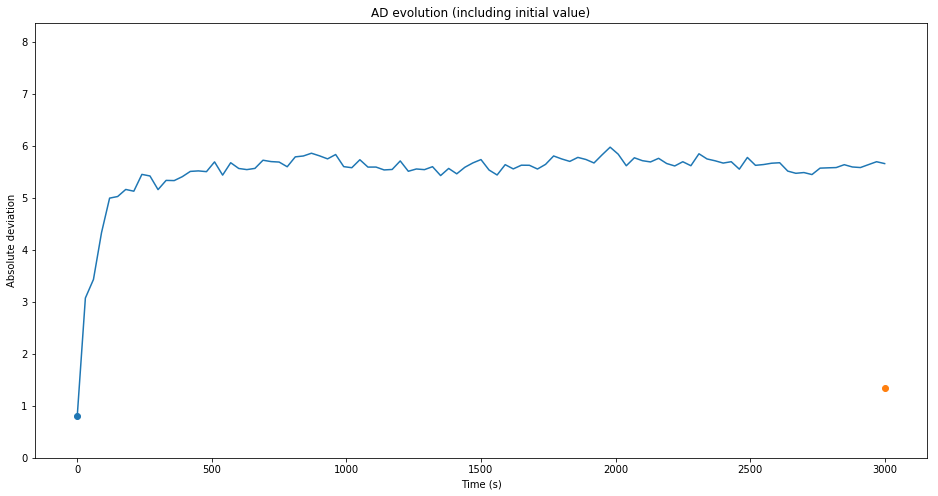

In [23]:
f, (ax) = plt.subplots(1, 1,figsize=(16,8))
conc2 =np.concatenate(([init_mean_AD],all_mean_ads))
ax.plot(np.arange(all_mean_ads.size+1) * hardcoded_t_record, conc2)
ax.set_title("AD evolution (including initial value)")
ax.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax.set_ylim([0, 1.4 * np.max(conc2)])
ax.set_ylabel("Absolute deviation")

ax.scatter(0, 0.81)
ax.scatter(all_mean_ads.size*hardcoded_t_record, 1.34)
plt.savefig("mean_ad_evo.png")

In [24]:
np.mean(all_mean_ads)

5.5445488820887237